In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
df = pd.read_csv(r"E:\PGDA 41\ALL COMPLETE ASSIGNMENT\Machine Learning\Classification Project\lung_cancer_risk_data.csv")

In [41]:
df.columns = df.columns.str.strip()

In [43]:
print("Dataset Shape:", df.shape)
print("\nDataset Preview:")
print(df.head())

Dataset Shape: (300, 9)

Dataset Preview:
   Age  Smokes  Alcohol Intake  Chronic Lung Disease  \
0   56       0               1                     0   
1   36       0               0                     0   
2   42       1               0                     1   
3   31       0               1                     0   
4   48       0               1                     0   

   Air Pollution Exposure (1-10)  Cough Frequency (1-10)  \
0                              3                       9   
1                              2                       6   
2                              6                       7   
3                              8                       2   
4                              2                       1   

   Fatigue Level (1-10)  Risk Score  Lung Cancer Risk  
0                     3           5                 0  
1                     4           6                 0  
2                     4           5                 0  
3                     8           3 

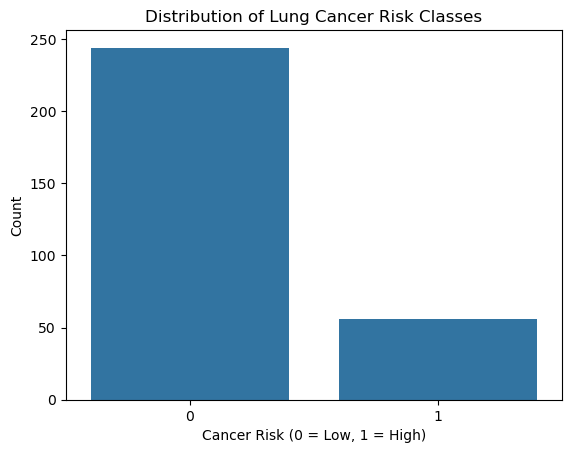

In [45]:
# Class Distribution
sns.countplot(x='Lung Cancer Risk', data=df)
plt.title("Distribution of Lung Cancer Risk Classes")
plt.xlabel("Cancer Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

In [47]:
X = df.drop(columns=["Risk Score", "Lung Cancer Risk"])
y = df["Lung Cancer Risk"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.2%}")


✅ Accuracy: 85.00%


In [57]:
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


📄 Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        47
           1       1.00      0.31      0.47        13

    accuracy                           0.85        60
   macro avg       0.92      0.65      0.69        60
weighted avg       0.87      0.85      0.82        60



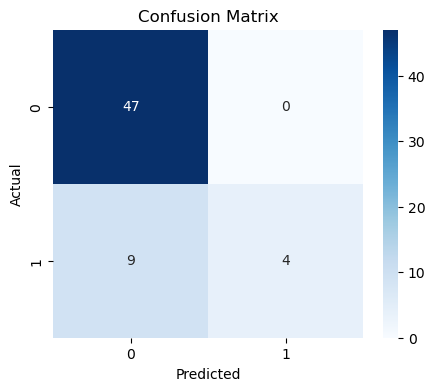

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()